# Árvores de Decisão

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

df = pd.read_csv('../normalizacao/survey_results_salary_numeric.csv', sep=',', encoding='utf-8', index_col=0)
df.head()

,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber,EdLevel_associate,EdLevel_bachelor,EdLevel_doctor,EdLevel_high_school,EdLevel_master,EdLevel_primary_school,EdLevel_professional,EdLevel_unfinished_college,Country_australia,Country_brazil,Country_canada,Country_france,Country_germany,Country_india,Country_italy,Country_netherlands,Country_poland,Country_spain,Country_united_kingdom_of_great_britain_and_northern_ireland,Country_united_states_of_america,Currency_AED,Currency_AUD,Currency_AZN,Currency_BDT,Currency_BRL,Currency_CAD,Currency_CHF,Currency_CZK,Currency_DJF,Currency_EUR,Currency_GBP,Currency_GIP,Currency_IDR,Currency_IMP,Currency_INR,Currency_IRR,Currency_JPY,Currency_KYD,Currency_MAD,Currency_NOK,Currency_NZD,Currency_PLN,Currency_SAR,Currency_TND,Currency_UGX,Currency_USD,Currency_XPF
0,10.601747,14.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.800718,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.007203,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.177673,12.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11.082143,12.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Conversão das variáveis categóricas para numéricas

No arquivo `normalizacao/conversao_categorias.ipynb`.

## Atributos Previsores e Alvo

In [2]:
previsores = df.iloc[:, 0:11].values
previsores

array([[10.60174664, 14.        ,  5.        , ...,  0.        ,
         0.        ,  0.        ],
       [10.80071778,  6.        ,  6.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.00720346,  5.        ,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.15625052,  5.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [10.46857406,  6.        ,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.23035033, 10.        ,  3.        , ...,  0.        ,
         0.        ,  0.        ]])

In [3]:
previsores.shape

(23265, 11)

In [4]:
alvo = df.iloc[:, 11].values
alvo

array([0., 0., 0., ..., 0., 0., 0.])

In [5]:
alvo.shape

(23265,)

## Escalonamento

In [6]:
from sklearn.preprocessing import StandardScaler

previsores_esc = StandardScaler().fit_transform(previsores)
previsores_esc

array([[-0.62796176, -0.14390853, -0.64732633, ..., -0.06019682,
        -0.11715584, -0.35677649],
       [-0.43315232, -0.96284862, -0.53030055, ..., -0.06019682,
        -0.11715584, -0.35677649],
       [-0.23098552, -1.06521613, -0.99840366, ..., -0.06019682,
        -0.11715584, -0.35677649],
       ...,
       [-0.08505594, -1.06521613, -1.11542943, ..., -0.06019682,
        -0.11715584, -0.35677649],
       [-0.75834889, -0.96284862, -0.99840366, ..., -0.06019682,
        -0.11715584, -0.35677649],
       [-0.01250602, -0.55337857, -0.88137788, ..., -0.06019682,
        -0.11715584, -0.35677649]])

In [7]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-0.627962,-0.143909,-0.647326,-0.194257,-0.967225,-0.208585,-0.213364,1.665450,-0.060197,-0.117156,-0.356776
1,-0.433152,-0.962849,-0.530301,-0.194257,-0.967225,-0.208585,-0.213364,1.665450,-0.060197,-0.117156,-0.356776
2,-0.230986,-1.065216,-0.998404,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776
3,0.915003,-0.348644,-0.062197,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776
4,-0.157614,-0.348644,-0.647326,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776
...,...,...,...,...,...,...,...,...,...,...,...
23260,-0.607407,-0.860481,-0.998404,5.147815,-0.967225,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776
23261,0.400997,0.572664,0.639957,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776
23262,-0.085056,-1.065216,-1.115429,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776
23263,-0.758349,-0.962849,-0.998404,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776


In [8]:
previsoresdf.dropna(inplace=True)

## Base de Treino e Teste

In [9]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [10]:
x_treino.shape

(16285, 11)

In [11]:
x_teste.shape

(6980, 11)

In [12]:
y_treino.shape

(16285,)

In [13]:
y_teste.shape

(6980,)

## Árvore de Decisão

[Text(0.4943181818181818, 0.9166666666666666, 'X[0] <= -0.369\nentropy = 0.209\nsamples = 16285\nvalue = [15748, 537]'),
 Text(0.29545454545454547, 0.75, 'X[0] <= -0.575\nentropy = 0.07\nsamples = 4623\nvalue = [4584, 39]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[2] <= 1.986\nentropy = 0.042\nsamples = 3338\nvalue = [3323, 15]'),
 Text(0.09090909090909091, 0.4166666666666667, 'X[1] <= -1.424\nentropy = 0.035\nsamples = 3291\nvalue = [3279, 12]'),
 Text(0.045454545454545456, 0.25, 'X[0] <= -0.666\nentropy = 0.371\nsamples = 28\nvalue = [26, 2]'),
 Text(0.022727272727272728, 0.08333333333333333, 'entropy = 0.229\nsamples = 27\nvalue = [26, 1]'),
 Text(0.06818181818181818, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13636363636363635, 0.25, 'X[0] <= -1.472\nentropy = 0.03\nsamples = 3263\nvalue = [3253, 10]'),
 Text(0.11363636363636363, 0.08333333333333333, 'entropy = 0.0\nsamples = 1009\nvalue = [1009, 0]'),
 Text(0.1590909090909091, 0.083333333

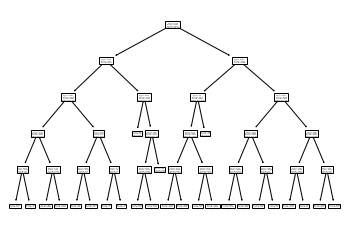

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=5)
_arvore = arvore.fit(x_treino, y_treino)

tree.plot_tree(_arvore)

In [25]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
y_teste

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 97.11%


In [29]:
confusion_matrix(y_teste, previsoes_arvore)

array([[6749,    2],
       [ 200,   29]], dtype=int64)

In [30]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      6751
         1.0       0.94      0.13      0.22       229

    accuracy                           0.97      6980
   macro avg       0.95      0.56      0.60      6980
weighted avg       0.97      0.97      0.96      6980



## Treino

In [31]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 97.03%


In [33]:
confusion_matrix(y_treino, previsoes_treino)

array([[15745,     3],
       [  480,    57]], dtype=int64)